# Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime

# Dados de Muçum

Importando dados da cidade de Muçum durante o período de 20/04/2024 às 16h a 20/06/2024. Os dados podem ser baixados pelo link https://www.snirh.gov.br/hidrotelemetria/serieHistorica.aspx

In [ ]:
url1 = "https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/mucumDadosEnchente.csv"
dadosMucum = pd.read_csv(url1, header = 4, sep=';')

In [ ]:
dadosMucum.head()

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,20/06/2024 15:45,0.0,829.0,2614.33,14.4,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20/06/2024 15:30,0.0,833.0,2632.99,14.4,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20/06/2024 15:15,0.0,838.0,2656.38,14.4,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20/06/2024 15:00,0.0,842.0,2675.14,14.4,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20/06/2024 14:45,0.0,843.0,2679.83,14.5,20.8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Excluindo linhas e colunas totalmente nulas
dadosMucum = dadosMucum.dropna(axis=1, how='all')
dadosMucum = dadosMucum.drop(5844)

In [ ]:
# Alterando o nome das colunas
dadosMucum.columns = ['Data/Hora',
 'ChuvaHoraria',
 'NivelAdotado',
 'Vazao',
 'Bateria',
 'TempInterna']

In [ ]:
dadosMucum.head()

,Data/Hora,ChuvaHoraria,NivelAdotado,Vazao,Bateria,TempInterna
0,20/06/2024 15:45,0.0,829.0,2614.33,14.4,21.0
1,20/06/2024 15:30,0.0,833.0,2632.99,14.4,21.0
2,20/06/2024 15:15,0.0,838.0,2656.38,14.4,21.0
3,20/06/2024 15:00,0.0,842.0,2675.14,14.4,21.0
4,20/06/2024 14:45,0.0,843.0,2679.83,14.5,20.8


In [ ]:
dadosMucum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data/Hora     5844 non-null   object 
 1   ChuvaHoraria  5840 non-null   float64
 2   NivelAdotado  5844 non-null   float64
 3   Vazao         5844 non-null   float64
 4   Bateria       5844 non-null   float64
 5   TempInterna   5844 non-null   float64
dtypes: float64(5), object(1)
memory usage: 274.1+ KB


In [ ]:
# Tratando o tipo dos dados
dadosMucum["Data/Hora"] = pd.to_datetime(dadosMucum["Data/Hora"], dayfirst=True)
dadosMucum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5844 entries, 0 to 5843
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data/Hora     5844 non-null   datetime64[ns]
 1   ChuvaHoraria  5840 non-null   float64       
 2   NivelAdotado  5844 non-null   float64       
 3   Vazao         5844 non-null   float64       
 4   Bateria       5844 non-null   float64       
 5   TempInterna   5844 non-null   float64       
 6   Data          5844 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 319.7+ KB


In [ ]:
# Vendo os dados nulos
dadosMucum.isna().sum()

,0
Data/Hora,0
ChuvaHoraria,4
NivelAdotado,0
Vazao,0
Bateria,0
TempInterna,0


In [ ]:
dadosMucum['is_na'] = dadosMucum.ChuvaHoraria.isna()
dadosMucum.query("is_na == True")

,Data/Hora,ChuvaHoraria,NivelAdotado,Vazao,Bateria,TempInterna,Data,is_na
4684,2024-05-02 17:45:00,NaN,2400.0,12139.7,12.9,21.4,2024-05-02,True
4685,2024-05-02 17:30:00,NaN,2398.0,12125.8,12.9,21.4,2024-05-02,True
4686,2024-05-02 17:15:00,NaN,2395.0,12105.0,12.9,21.4,2024-05-02,True
4687,2024-05-02 17:00:00,NaN,2387.0,12049.7,12.9,21.4,2024-05-02,True


In [ ]:
# Fazendo a correlação
dadosMucum.corr()

,Data/Hora,ChuvaHoraria,NivelAdotado,Vazao,Bateria,TempInterna
Data/Hora,1.000000,-0.119417,-0.180698,-0.194006,0.030866,-0.213287
ChuvaHoraria,-0.119417,1.000000,0.198707,0.203766,-0.114429,0.063587
NivelAdotado,-0.180698,0.198707,1.000000,0.992560,-0.127080,-0.003654
Vazao,-0.194006,0.203766,0.992560,1.000000,-0.131331,0.034504
Bateria,0.030866,-0.114429,-0.127080,-0.131331,1.000000,0.265505
TempInterna,-0.213287,0.063587,-0.003654,0.034504,0.265505,1.000000


# Dados de Encantado

Repetindo os procedimentos anteriores para as bases de dados de Encantado e Santa Tereza durante o mesmo período de tempo

In [ ]:
url2 = 'https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/encantadoDadosEnchente.csv'
dadosEncantado = pd.read_csv(url2, header = 4, sep=';')
dadosEncantado.head()

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,20/06/2024 16:00,0.0,NaN,NaN,13.8,20.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20/06/2024 15:45,0.0,NaN,NaN,13.8,20.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20/06/2024 15:30,0.0,NaN,NaN,13.8,20.3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20/06/2024 15:15,0.0,NaN,NaN,13.9,20.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20/06/2024 15:00,0.0,NaN,NaN,13.9,20.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dadosEncantado = dadosEncantado.dropna(axis=1, how='all')
dadosEncantado = dadosEncantado.drop(0)
dadosEncantado = dadosEncantado.drop(5856)
dadosEncantado.head()

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC)
1,20/06/2024 15:45,0.0,NaN,NaN,13.8,20.3
2,20/06/2024 15:30,0.0,NaN,NaN,13.8,20.3
3,20/06/2024 15:15,0.0,NaN,NaN,13.9,20.4
4,20/06/2024 15:00,0.0,NaN,NaN,13.9,20.4
5,20/06/2024 14:45,0.0,NaN,NaN,13.9,20.4


In [ ]:
dadosEncantado.isna().sum()

,0
Data/Hora,0
Chuva Horária (mm),25
Nível adotado (cm),4645
Vazão (m³/s),4943
Bateria (V),3
Temp. Interna (ºC),3


In [ ]:
dadosEncantado["Data/Hora"] = pd.to_datetime(dadosEncantado["Data/Hora"], dayfirst=True)

In [ ]:
dadosEncantado.columns=['Data/Hora',
 'ChuvaHoraria',
 'NivelAdotado',
 'Vazao',
 'Bateria',
 'TempInterna']

In [ ]:
dadosEncantado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5855 entries, 1 to 5855
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data/Hora     5855 non-null   datetime64[ns]
 1   ChuvaHoraria  5830 non-null   float64       
 2   NivelAdotado  1210 non-null   float64       
 3   Vazao         912 non-null    float64       
 4   Bateria       5852 non-null   float64       
 5   TempInterna   5852 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 274.6 KB


# Dados de Santa Tereza

In [ ]:
url3 = "https://raw.githubusercontent.com/BusinessAnalyticsHub/Bootcamp_3ed/refs/heads/develop/Grupos%20Tarde/Grupo%202%20-%20RiverWatch%20Consultoria/santaTerezaDadosEnchente.csv"
dadosSantaTereza = pd.read_csv(url3, header = 4, sep=';')
dadosSantaTereza.head()

,Data/Hora,Chuva Horária (mm),Nível adotado (cm),Vazão (m³/s),Bateria (V),Temp. Interna (ºC),Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,20/06/2024 16:00,0.0,722.0,NaN,14.3,21.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20/06/2024 15:45,0.0,715.0,NaN,14.4,21.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20/06/2024 15:30,0.0,712.0,NaN,14.4,21.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20/06/2024 15:15,0.0,713.0,NaN,14.4,21.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20/06/2024 15:00,0.0,718.0,NaN,14.4,21.4,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dadosSantaTereza = dadosSantaTereza.dropna(axis=1, how='all')
dadosSantaTereza = dadosSantaTereza.drop(0)
dadosSantaTereza = dadosSantaTereza.drop(5645)

In [ ]:
dadosSantaTereza["Data/Hora"] = pd.to_datetime(dadosSantaTereza["Data/Hora"], dayfirst=True)

In [ ]:
dadosSantaTereza.columns=['Data/Hora',
 'ChuvaHoraria',
 'NivelAdotado',
 'Bateria',
 'TempInterna']

In [ ]:
dadosSantaTereza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 1 to 5644
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Data/Hora     5644 non-null   datetime64[ns]
 1   ChuvaHoraria  5644 non-null   float64       
 2   NivelAdotado  5631 non-null   float64       
 3   Bateria       5644 non-null   float64       
 4   TempInterna   5644 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 220.6 KB


In [ ]:
dadosSantaTereza.isna().sum()

,0
Data/Hora,0
ChuvaHoraria,0
NivelAdotado,13
Bateria,0
TempInterna,0


In [ ]:
# Encontrando os dados nulos
dadosSantaTereza['is_na'] = dadosSantaTereza.NivelAdotado.isna()
dadosSantaTereza.query("is_na == True")

,Data/Hora,ChuvaHoraria,NivelAdotado,Bateria,TempInterna,is_naE,is_na
5485,2024-04-22 07:45:00,0.0,NaN,12.8,16.4,True,True
5486,2024-04-22 07:30:00,0.0,NaN,12.8,16.4,True,True
5487,2024-04-22 07:15:00,0.0,NaN,12.8,16.4,True,True
5488,2024-04-22 07:00:00,0.0,NaN,12.8,16.4,True,True
5489,2024-04-22 06:45:00,0.0,NaN,12.8,16.5,True,True
5490,2024-04-22 06:30:00,0.0,NaN,12.8,16.5,True,True
5517,2024-04-21 23:45:00,0.0,NaN,12.9,18.8,True,True
5518,2024-04-21 23:30:00,0.0,NaN,12.9,18.8,True,True
5519,2024-04-21 23:15:00,0.0,NaN,12.9,18.8,True,True
5520,2024-04-21 23:00:00,0.0,NaN,12.9,18.8,True,True


In [ ]:
print("Quantidade de linhas e colunas dos dados de Muçum:", dadosMucum.shape)
print("Quantidade de linhas e colunas dos dados de Encantado:", dadosEncantado.shape)
print("Quantidade de linhas e colunas dos dados de Santa Tereza:", dadosSantaTereza.shape)

Quantidade de linhas e colunas dos dados de Muçum: (5844, 6)
Quantidade de linhas e colunas dos dados de Encantado: (5855, 6)
Quantidade de linhas e colunas dos dados de Santa Tereza: (5644, 5)


# Análise das Séries Temporais

Escolhemos analisar o período de 20 de abril a 20 de junho para pegar o período das enchentes

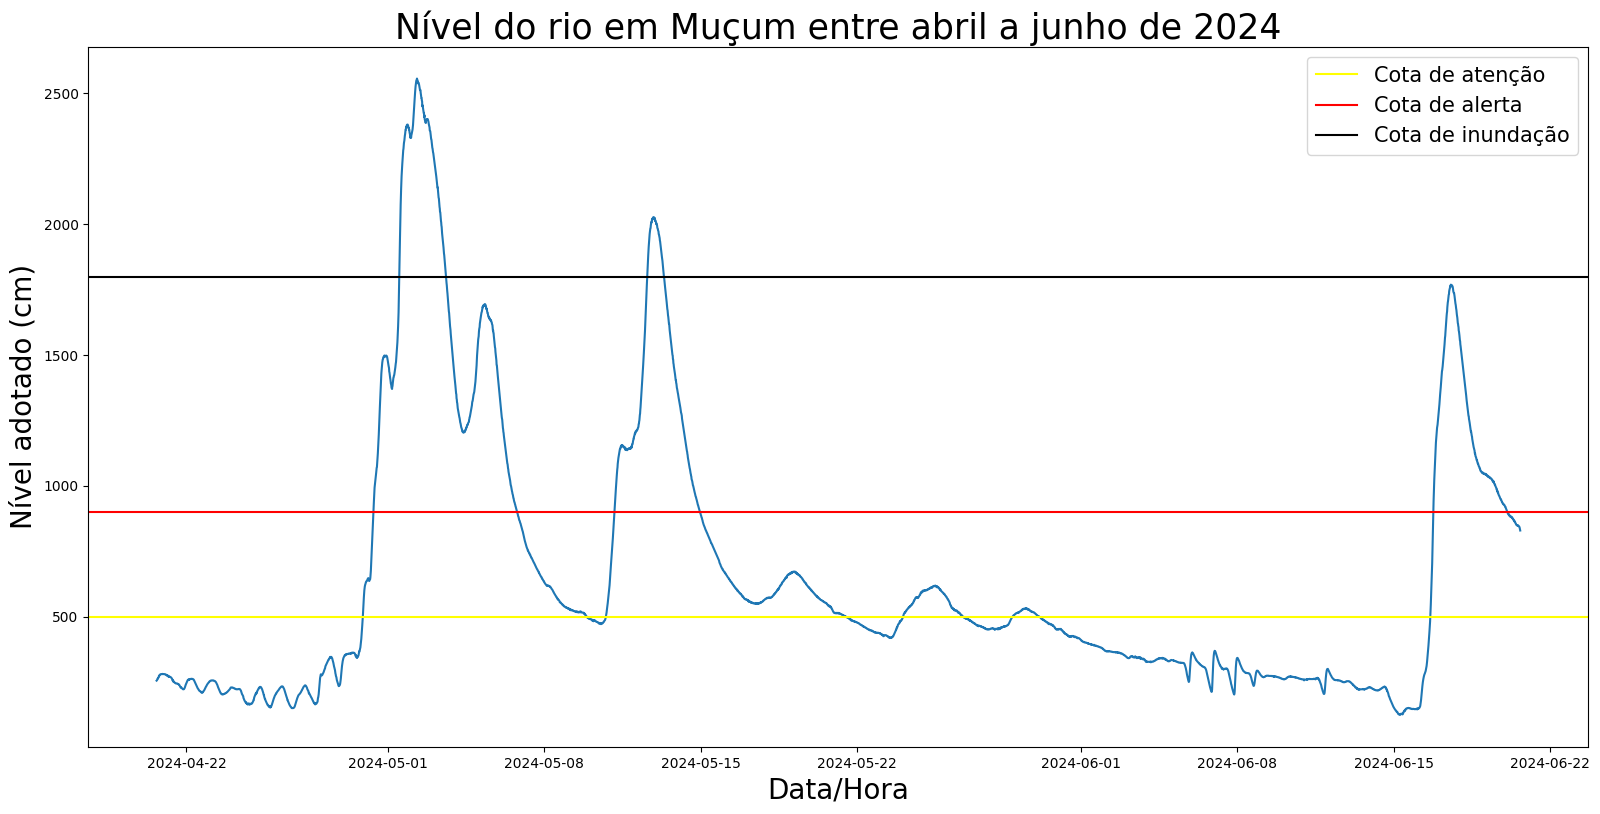

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(dadosMucum["Data/Hora"], dadosMucum["NivelAdotado"])

ax.set_title('Nível do rio em Muçum entre abril a junho de 2024', fontsize=25)
ax.set_ylabel('Nível adotado (cm)', fontsize=20)
ax.set_xlabel('Data/Hora', fontsize=20)
ax.axhline(500, label="Cota de atenção", color='yellow')
ax.axhline(900, label="Cota de alerta", color='red')
ax.axhline(1800, label="Cota de inundação", color='black')
ax.legend(fontsize='15')
ax=ax

In [ ]:
# Agrupar por dia e calcular a média do 'Nível adotado (cm)'

dadosMucum['Data'] = dadosMucum['Data/Hora'].dt.date  # Criar uma coluna apenas com a data (sem horas)

media_diaria_nivel = dadosMucum.groupby('Data')['NivelAdotado'].mean()

media_diaria_nivel = media_diaria_nivel.reset_index()
media_diaria_nivel.head()


,Data,NivelAdotado
0,2024-04-20,273.312500
1,2024-04-21,250.906250
2,2024-04-22,238.375000
3,2024-04-23,228.416667
4,2024-04-24,197.989583


In [ ]:
# Calculando aumento e aceleração da média diária do nível do rio
dadosNivelMucum = media_diaria_nivel[['Data',"NivelAdotado"]].copy()
dadosNivelMucum['aumento'] = media_diaria_nivel['NivelAdotado'].diff()
dadosNivelMucum['aceleracao'] = dadosNivelMucum['aumento'].diff()
dadosNivelMucum.head()

,Data,NivelAdotado,aumento,aceleracao
0,2024-04-20,273.312500,NaN,NaN
1,2024-04-21,250.906250,-22.406250,NaN
2,2024-04-22,238.375000,-12.531250,9.875000
3,2024-04-23,228.416667,-9.958333,2.572917
4,2024-04-24,197.989583,-30.427083,-20.468750


In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18,loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

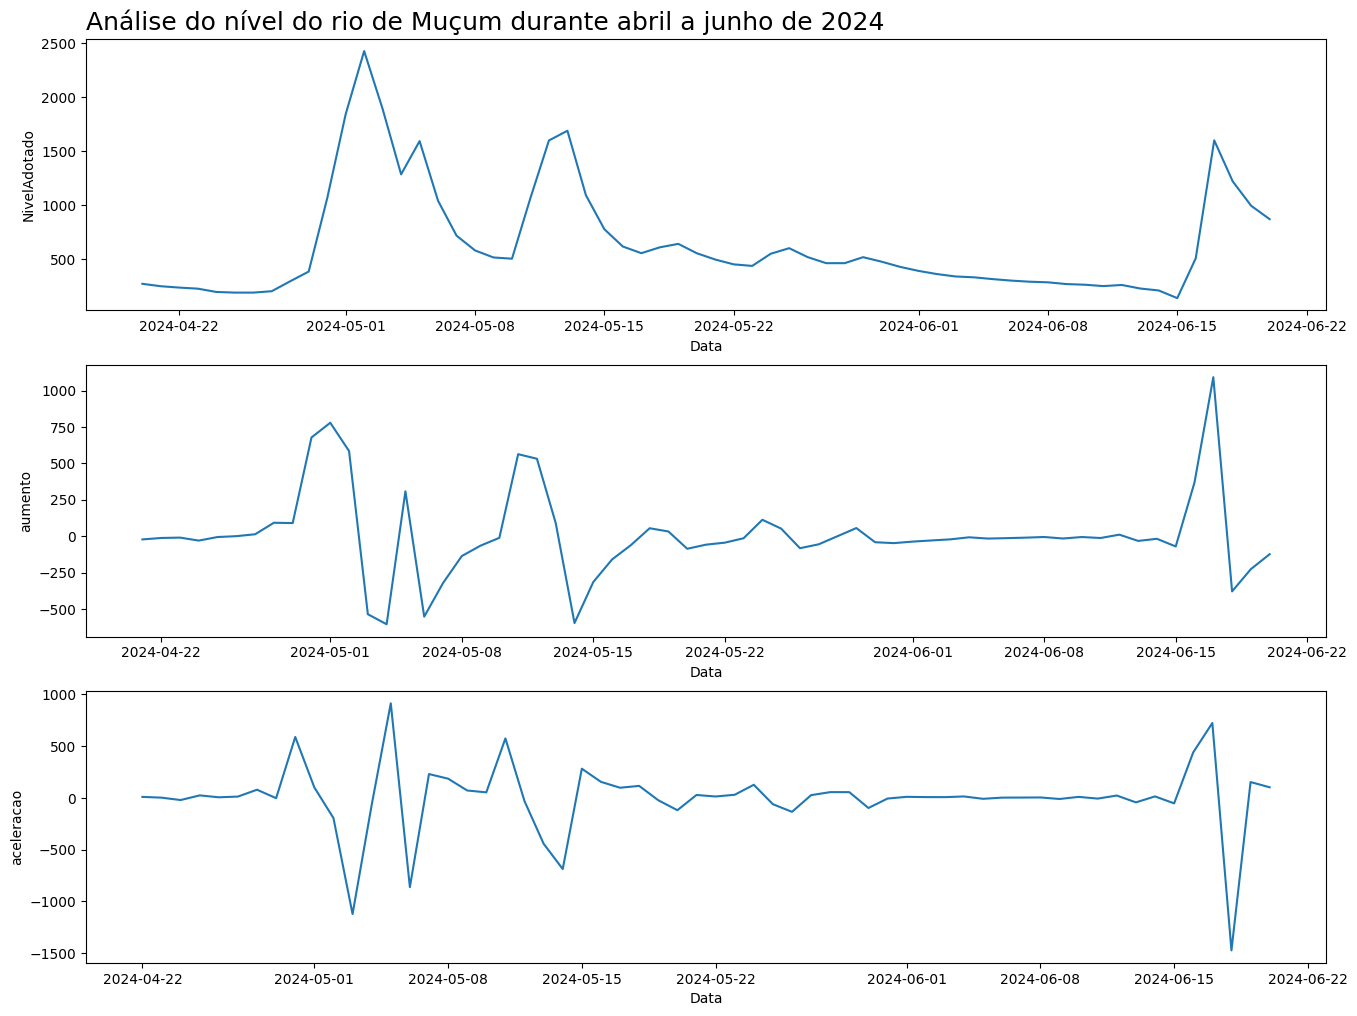

In [ ]:
plot_comparacao('Data', 'NivelAdotado', 'aumento', 'aceleracao', dadosNivelMucum, "Análise do nível do rio de Muçum durante abril a junho de 2024")

In [ ]:
# Comparando os niveis das diferentes cidades
niveis = dadosEncantado[['Data/Hora', 'NivelAdotado']].copy()
niveis.columns = ['Data/Hora', 'NívelEncantado']
niveis["NivelSantaTereza"] = dadosSantaTereza[['NivelAdotado']].copy()
niveis["NivelMucum"] = dadosMucum[['NivelAdotado']].copy()

niveis.head()

,Data/Hora,NívelEncantado,NivelSantaTereza,NivelMucum
1,2024-06-20 15:45:00,NaN,715.0,833.0
2,2024-06-20 15:30:00,NaN,712.0,838.0
3,2024-06-20 15:15:00,NaN,713.0,842.0
4,2024-06-20 15:00:00,NaN,718.0,843.0
5,2024-06-20 14:45:00,NaN,727.0,844.0


In [ ]:
niveis.shape

(5855, 4)

In [ ]:
niveis.isna().sum()

,0
Data/Hora,0
Nível Encantado,4645
NivelSantaTereza,224
NivelMucum,12


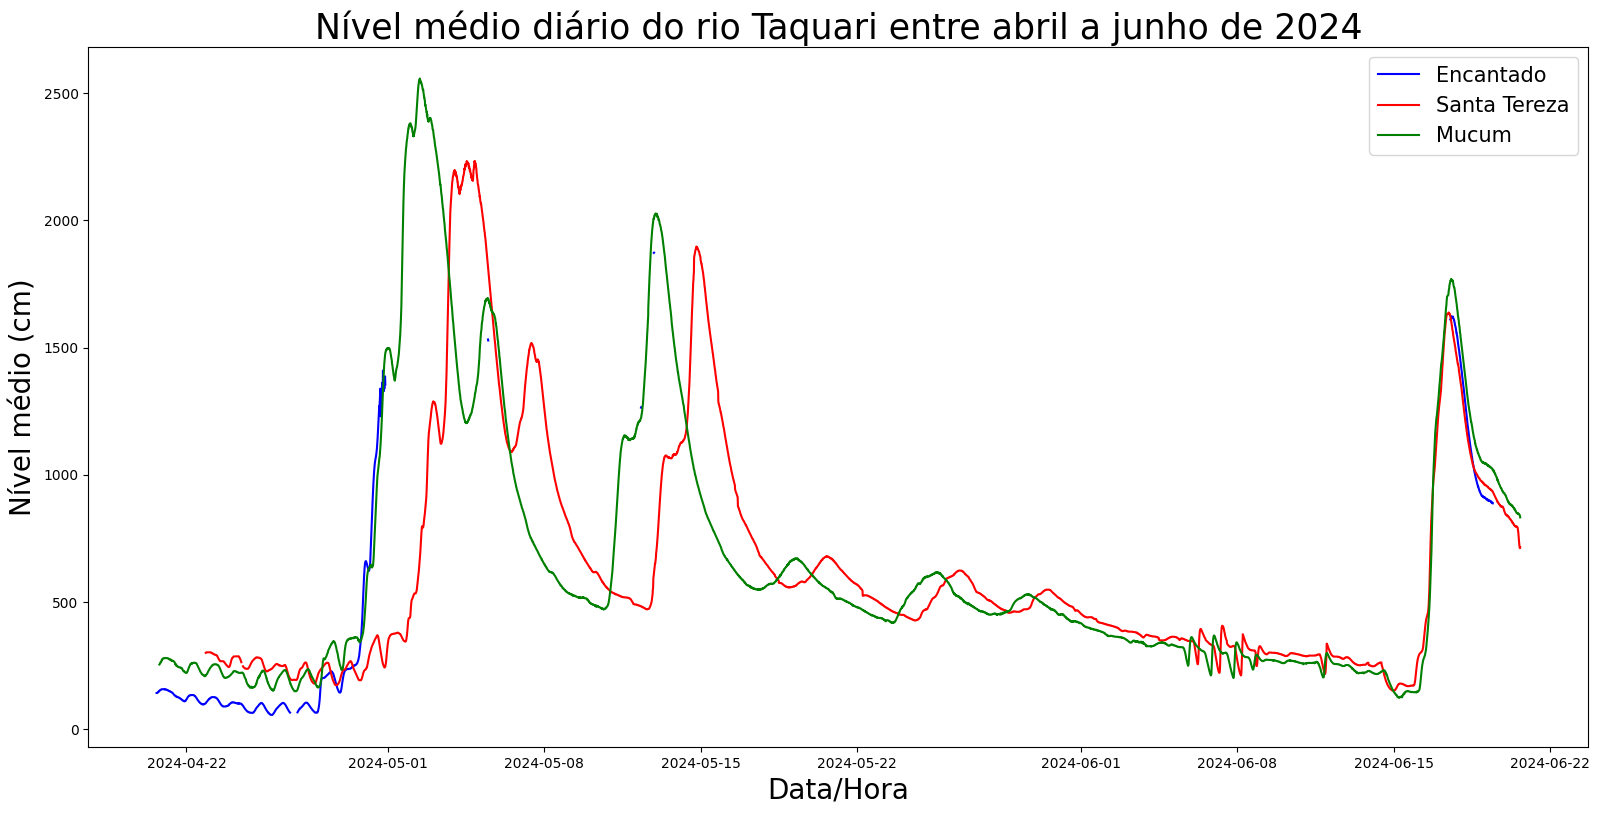

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
y1=niveis['NívelEncantado']
y2=niveis['NivelSantaTereza']
y3=niveis['NivelMucum']
ax.plot(niveis['Data/Hora'], y1, color='blue', label='Encantado')
ax.plot(niveis['Data/Hora'], y2, color='red', label='Santa Tereza')
ax.plot(niveis['Data/Hora'], y3, color='green', label='Mucum')
ax.set_title('Nível médio diário do rio Taquari entre abril a junho de 2024', fontsize=25)
ax.set_ylabel('Nível médio (cm)', fontsize=20)
ax.set_xlabel('Data/Hora', fontsize=20)
ax.legend(fontsize='15')
ax=ax

In [ ]:
# Comparando a chuva em diferentes cidades
chuva = dadosEncantado[['Data/Hora', 'ChuvaHoraria']].copy()
chuva.columns = ['Data/Hora', 'ChuvaEncantado']
chuva["ChuvaSantaTereza"] = dadosSantaTereza[['ChuvaHoraria']].copy()
chuva["ChuvaMucum"] = dadosMucum[['ChuvaHoraria']].copy()
chuva.head()

,Data/Hora,ChuvaEncantado,ChuvaSantaTereza,ChuvaMucum
1,2024-06-20 15:45:00,0.0,0.0,0.0
2,2024-06-20 15:30:00,0.0,0.0,0.0
3,2024-06-20 15:15:00,0.0,0.0,0.0
4,2024-06-20 15:00:00,0.0,0.0,0.0
5,2024-06-20 14:45:00,0.0,0.0,0.0


In [ ]:
# Fazendo a soma total diária da chuva em cada uma das três cidades
chuva['Data'] = chuva['Data/Hora'].dt.date  # Criar uma coluna apenas com a data (sem horas)
chuva_total_diaria = chuva.groupby('Data').agg({
    'ChuvaEncantado': 'sum',
    'ChuvaSantaTereza': 'sum',
    'ChuvaMucum': 'sum'
})
chuva_total_diaria = chuva_total_diaria.reset_index()
chuva_total_diaria.head()

,Data,ChuvaEncantado,ChuvaSantaTereza,ChuvaMucum
0,2024-04-20,0.0,0.0,0.0
1,2024-04-21,0.2,0.0,2.8
2,2024-04-22,0.0,0.0,0.0
3,2024-04-23,21.8,0.0,0.0
4,2024-04-24,0.2,0.0,16.4


In [ ]:
chuva_total_diaria.isna().sum()

,0
Data,0
ChuvaEncantado,0
ChuvaSantaTereza,0
ChuvaMucum,0


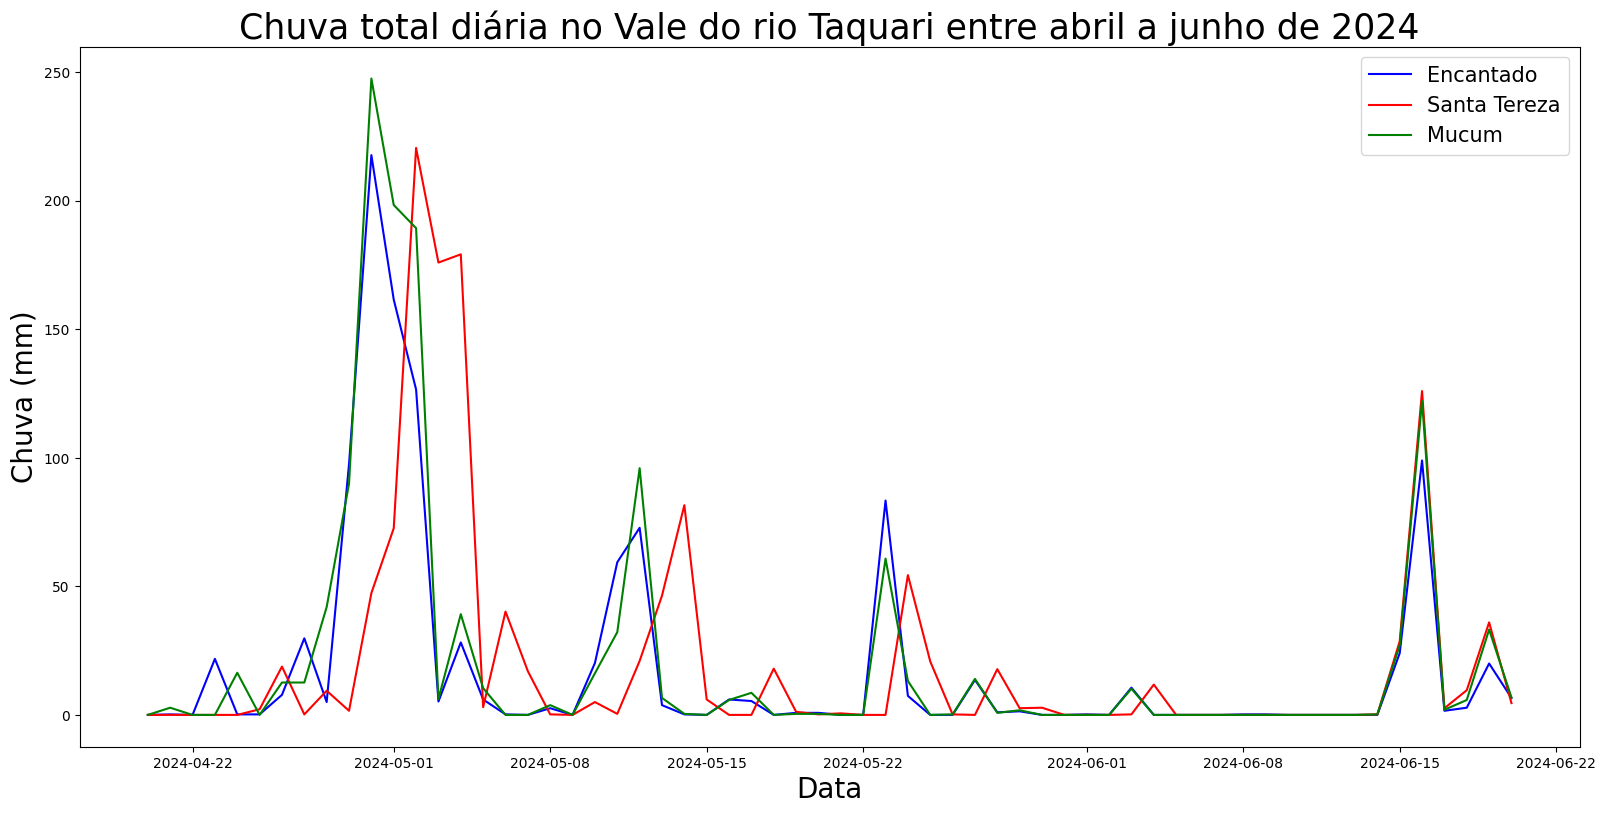

In [ ]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_axes([0, 0, 1, 1])
y1=chuva_total_diaria['ChuvaEncantado']
y2=chuva_total_diaria['ChuvaSantaTereza']
y3=chuva_total_diaria['ChuvaMucum']
ax.plot(chuva_total_diaria['Data'], y1, color='blue', label='Encantado')
ax.plot(chuva_total_diaria['Data'], y2, color='red', label='Santa Tereza')
ax.plot(chuva_total_diaria['Data'], y3, color='green', label='Mucum')
ax.set_title('Chuva total diária no Vale do rio Taquari entre abril a junho de 2024', fontsize=25)
ax.set_ylabel('Chuva (mm)', fontsize=20)
ax.set_xlabel('Data', fontsize=20)
ax.legend(fontsize='15')
ax=ax

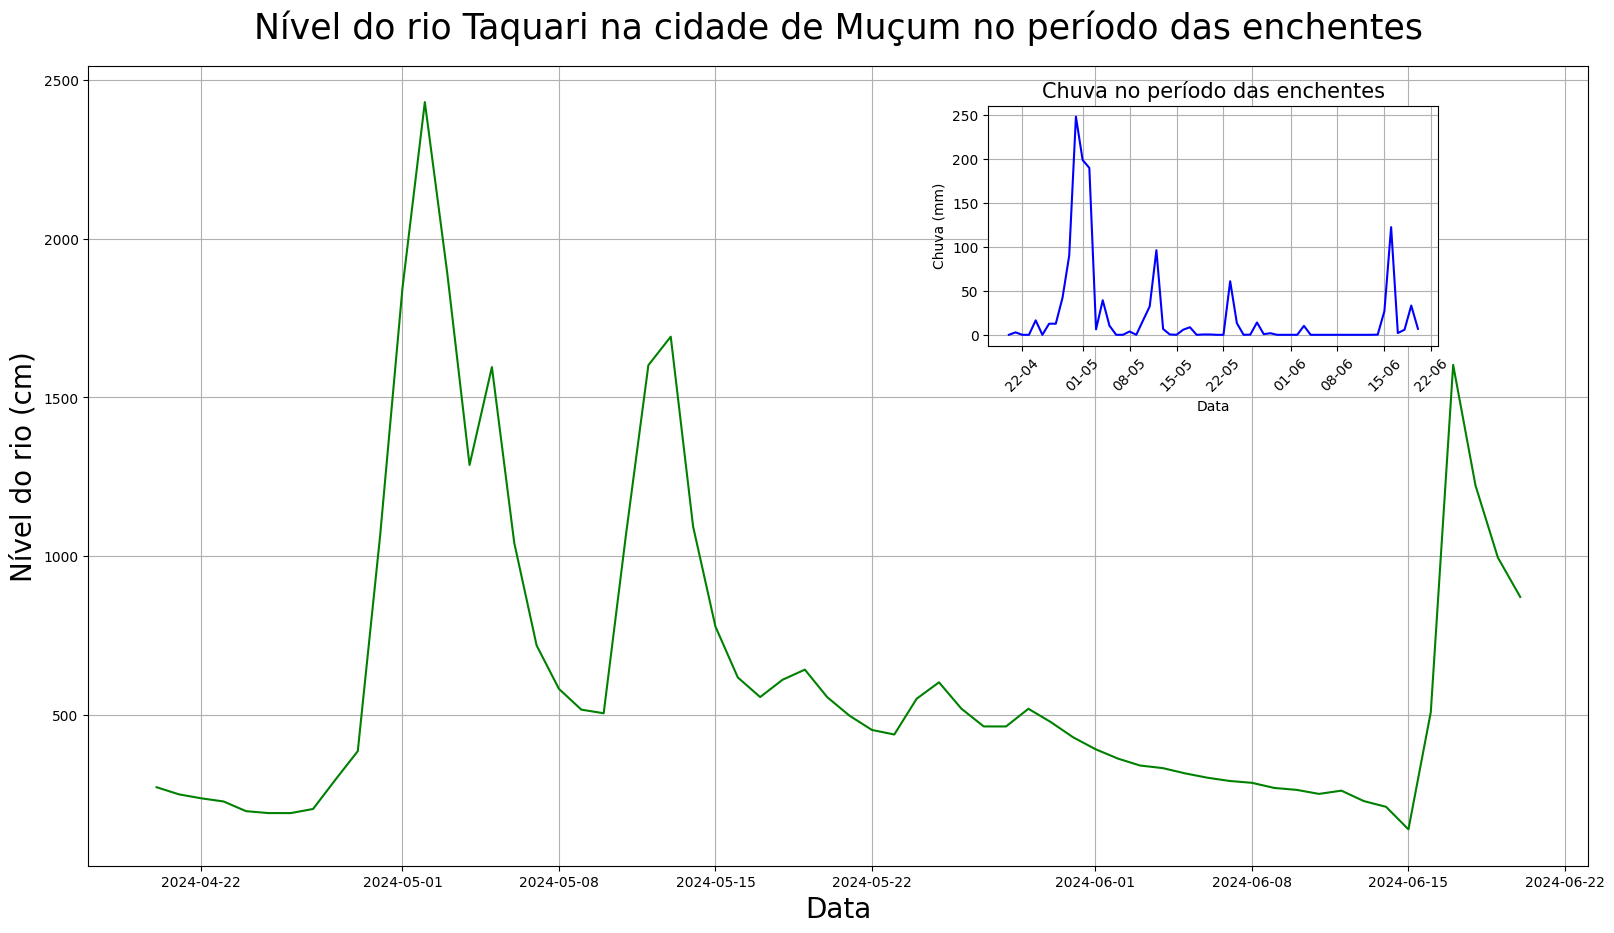

In [ ]:
fig = plt.figure(figsize=(15,8))

eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.6, 0.65, 0.3, 0.3])

eixo.grid(True)
eixo.plot(media_diaria_nivel['Data'], media_diaria_nivel['NivelAdotado'], color = 'g')
eixo.set_title('Nível do rio Taquari na cidade de Muçum no período das enchentes', fontsize=25, pad=20)
eixo.set_ylabel('Nível do rio (cm)', fontsize=20)
eixo.set_xlabel('Data', fontsize=20)

eixo2.plot(media_diaria_nivel['Data'], chuva_total_diaria['ChuvaMucum'], color = 'b')
eixo2.set_title('Chuva no período das enchentes', fontsize=15)
# Formatação dos labels do eixo X para mostrar apenas dia e mês
import matplotlib.dates as mdates
eixo2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
eixo2.tick_params(axis='x', rotation=45)
eixo2.set_ylabel('Chuva (mm)', fontsize=10)
eixo2.set_xlabel('Data', fontsize=10)
eixo2.grid(True)

In [ ]:
# Agrupar por dia
chuva_comparacao = chuva_total_diaria[['Data',"ChuvaMucum"]].copy()
chuva_comparacao['aumento'] = chuva_total_diaria['ChuvaMucum'].diff()
chuva_comparacao['aceleracao'] = chuva_comparacao['aumento'].diff()
chuva_comparacao.head()

,Data,ChuvaMucum,aumento,aceleracao
0,2024-04-20,0.0,NaN,NaN
1,2024-04-21,2.8,2.8,NaN
2,2024-04-22,0.0,-2.8,-5.6
3,2024-04-23,0.0,0.0,2.8
4,2024-04-24,16.4,16.4,16.4


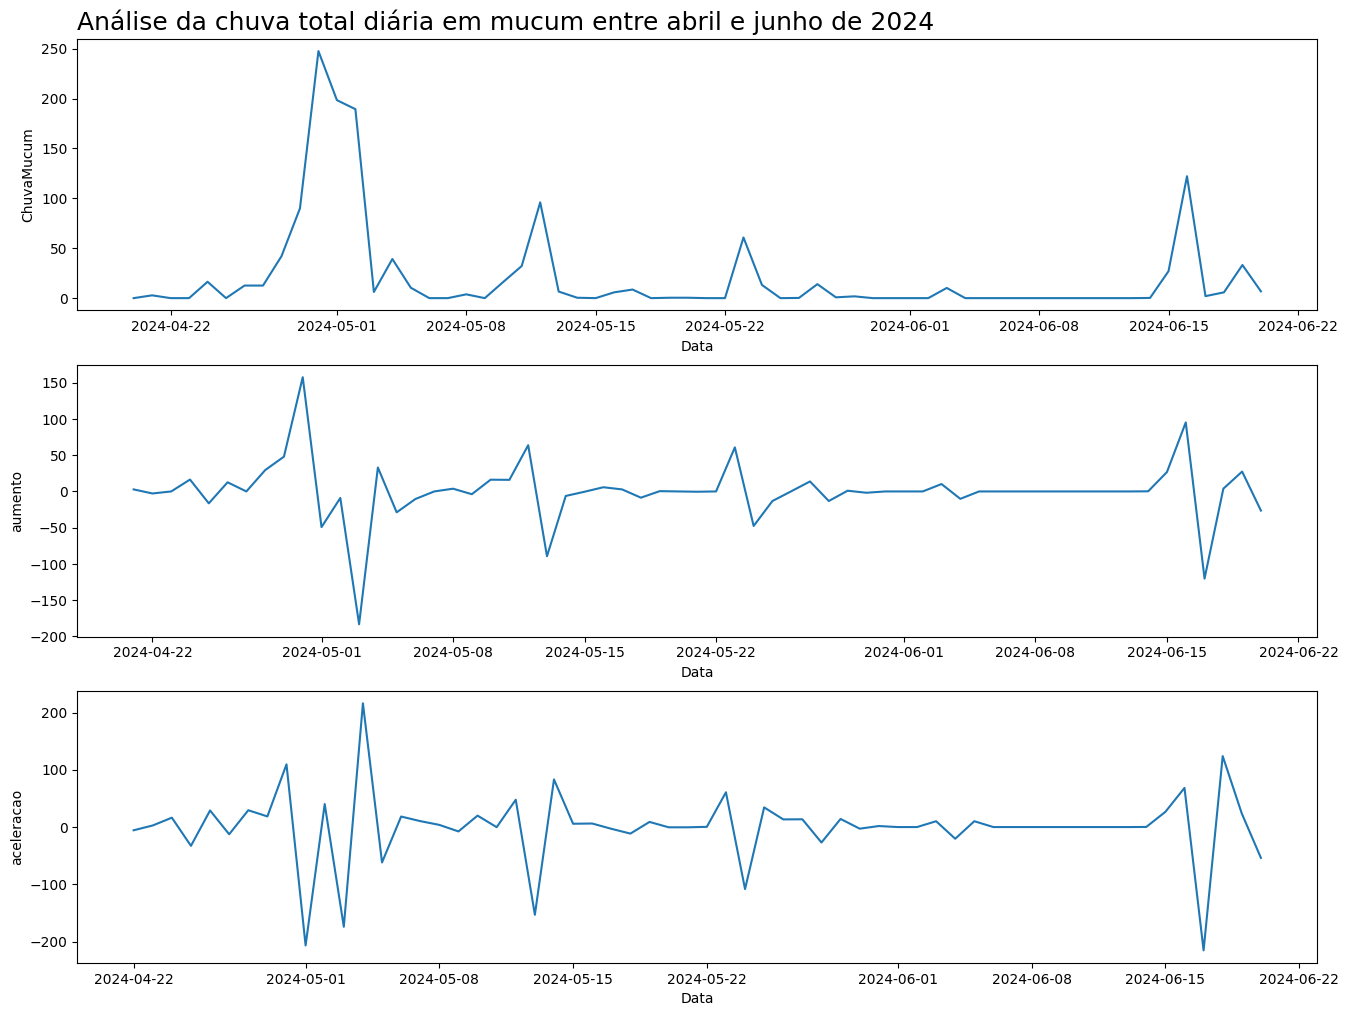

In [ ]:
plot_comparacao("Data",'ChuvaMucum','aumento','aceleracao',chuva_comparacao,"Análise da chuva total diária em mucum entre abril e junho de 2024")

In [ ]:
# Fazer a correlação entre a chuva diária e o aumento diário do rio
dadosNivelMucum["ChuvaDiaria(mm)"] = chuva_total_diaria["ChuvaMucum"].copy()
dadosNivelMucum.head()

,Data,NivelAdotado,aumento,aceleracao,ChuvaDiaria(mm)
0,2024-04-20,273.312500,NaN,NaN,0.0
1,2024-04-21,250.906250,-22.406250,NaN,2.8
2,2024-04-22,238.375000,-12.531250,9.875000,0.0
3,2024-04-23,228.416667,-9.958333,2.572917,0.0
4,2024-04-24,197.989583,-30.427083,-20.468750,16.4


In [ ]:
dadosNivelMucum.isna().sum()

,0
Data,0
NivelAdotado,0
aumento,1
aceleracao,2
ChuvaDiaria(mm),0


# Análise de Correlação

<Axes: xlabel='NivelAdotado', ylabel='Vazao'>

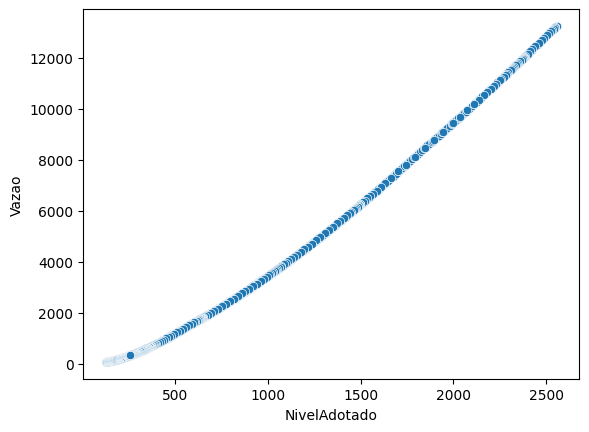

In [ ]:
sns.scatterplot(x=dadosMucum["NivelAdotado"], y=dadosMucum["Vazao"])

In [ ]:
dados_corr = dadosMucum[["NivelAdotado", "Vazao"]].dropna()

y = dados_corr["NivelAdotado"]
x = dados_corr["Vazao"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           NivelAdotado   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 3.882e+05
Date:                Thu, 31 Oct 2024   Prob (F-statistic):               0.00
Time:                        16:08:07   Log-Likelihood:                -32513.
No. Observations:                5844   AIC:                         6.503e+04
Df Residuals:                    5842   BIC:                         6.504e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        240.5854      1.055    228.111      0.0

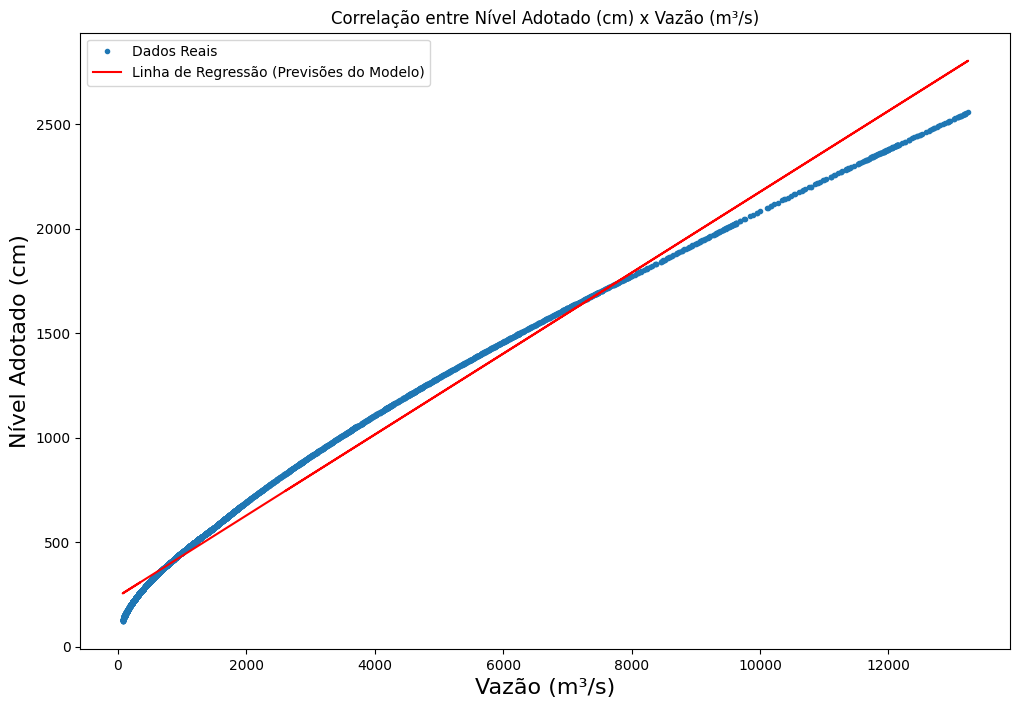

In [ ]:
# Plot
plt.figure(figsize = (12, 8))
plt.xlabel("Vazão (m³/s)", size = 16)
plt.ylabel("Nível Adotado (cm)", size = 16)
plt.plot(x["Vazao"], y, ".", label = "Dados Reais")
plt.plot(x["Vazao"], model.fittedvalues, "r-", label = "Linha de Regressão (Previsões do Modelo)")
plt.title("Correlação entre Nível Adotado (cm) x Vazão (m³/s)")
plt.legend(loc = "best")
plt.show()

In [ ]:
correlation_matrix = dadosNivelMucum.drop('Data', axis=1).corr()

# Print the correlation matrix
print(correlation_matrix)

                 NivelAdotado   aumento  aceleracao  ChuvaDiaria(mm)
NivelAdotado         1.000000  0.287282   -0.149943         0.481197
aumento              0.287282  1.000000    0.594538         0.569689
aceleracao          -0.149943  0.594538    1.000000         0.193122
ChuvaDiaria(mm)      0.481197  0.569689    0.193122         1.000000


Isso nos diz que a chuva total diária em Muçum tem forte correlação com a média diária do nível do rio em Muçum e o aumento da média do nível